In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def read_pearson(pearson: str, format="juicer") -> np.ndarray:
    """
    :param pearson: The text file path of `juicer_tools <https://github.com/aidenlab/juicer/wiki/Pearsons>`_  created Pearson matrix.
    :type pearson: str
    :return All `0` rows/columns removed pearson_np.
    :rtype: numpy.ndarray
    """
    if format == "juicer":
        pearson_df = pd.read_table(pearson, header=None, sep="\s+")
        pearson_np = pearson_df.values # Turn into numpy.ndarray
        pearson_np = pearson_np.astype('float64')
    elif format == "aiden_2009":
        pearson_df = pd.read_table(pearson, index_col=0, header=1, sep="\s+")
        pearson_np = pearson_df.values # Turn into numpy.ndarray
        pearson_np = pearson_np.astype('float64')
        diag = np.diag(pearson_np)
        diag_valid = diag != 0
        ixgrid = np.ix_(diag_valid, diag_valid) # Extract the valid sub-matrix.

        # Fill the all-zero rows/columns with `NaN`.
        # length = len(pearson_np)
        # tmp = np.full((length, length), np.nan) 
        # tmp[ixgrid] = pearson_np[ixgrid] 
        # pearson_np = tmp 

    return pearson_np[ixgrid]

[0.14112112 0.03712375]


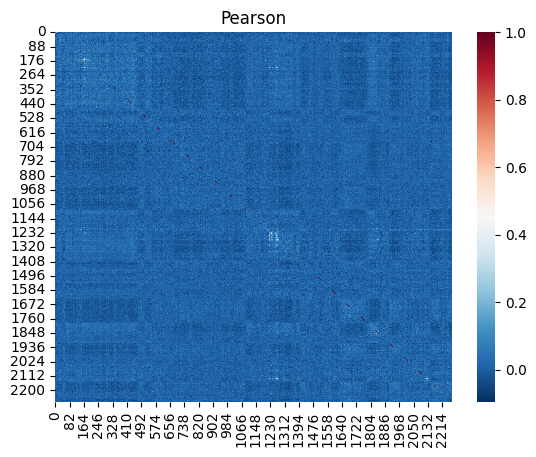

In [2]:
pearson_np = read_pearson(pearson="/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpep/data_store/data/lieberman_2009/heatmaps/HIC_gm06690_chr1_chr1_100000_pearson.txt", format="aiden_2009")
ax = plt.axes()
sns.heatmap(pearson_np, ax=ax, cmap="RdBu_r")
ax.set_title(f'Pearson')

pca = PCA(n_components=2)
pca.fit(pearson_np)
print(pca.explained_variance_ratio_)

[0.86124773 0.05297706]


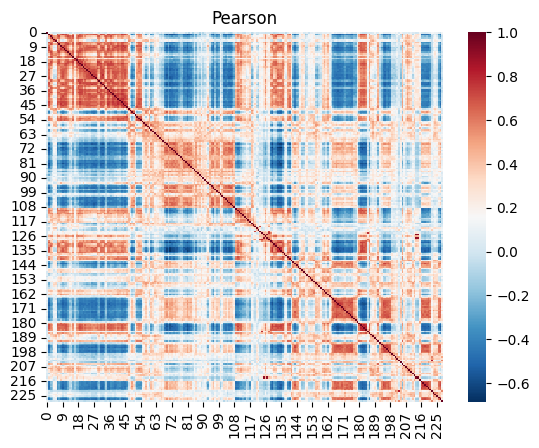

In [3]:
pearson_np = read_pearson(pearson="/media/jordan990301/Samsung_T5/HiC_Datasets/data_for_hicpep/data_store/data/lieberman_2009/heatmaps/HIC_gm06690_chr1_chr1_1000000_pearson.txt", format="aiden_2009")
ax = plt.axes()
sns.heatmap(pearson_np, ax=ax, cmap="RdBu_r")
ax.set_title(f'Pearson')

pca = PCA(n_components=2)
pca.fit(pearson_np)
print(pca.explained_variance_ratio_)